In [4]:
!pip install pandas
!pip install NumPy
!pip install matplotlib
#!pip install zipfile

In [5]:
!pip install plydata

In [100]:
!pip install collections

ERROR: Could not find a version that satisfies the requirement collections (from versions: none)
ERROR: No matching distribution found for collections


Import Packages 

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plydata import define, if_else
from collections import Counter

In [7]:
anime = pd.read_csv("anime.csv")
animelist = pd.read_csv("animelist.csv")
anime_with_synopsis = pd.read_csv("anime_with_synopsis.csv")
rating_complete = pd.read_csv("rating_complete.csv")
watching_status = pd.read_csv("watching_status.csv")


In [8]:
# explore anime data
# my animelist id
# full name of anime
# average score of anime out of 10
# genres (txt, separated by columns)
# English name
# japanese name: DISCARD
# type TV, OVA, Other
# episodes: filter > 1 
# aired: broadcast date: extract year
# premiered: DISCARD
# Producers: DISCARD (44% unknown)
# Licensors: DISCARD (79% unknown)
# Studios: comma separated list of studios
# Duration: duration of anime per episode
# Rating: age rating 
# Ranked: DISCARD
# Popularity: position basdd on the number of users who have added the anime to their list
# Members: number of community members that are in this anime's "group"
# Favorites: number of users who have the anime as "favorites"
# Watching: number of users who are watching the anime 
# Completed: number of users who have completed the anime
# On-Hold: number of users who have the anime on hold
# Dropped: number of users who have dropped the anime 
# Plan to Watch: number of users who plan to watch the anime

# number of users who scored...
# Score-10: DISCARD
# Score-9: DISCARD
# Score-8: DISCARD
# Score-7: DISCARD
# Score-6: DISCARD
# Score-5: DISCARD
# Score-4: DISCARD
# Score-3: DISCARD
# Score-2: DISCARD
# Score-1: DISCARD


anime.info()
anime.shape # 17562 rows, 35 columns

anime.head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17562 entries, 0 to 17561
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MAL_ID         17562 non-null  int64 
 1   Name           17562 non-null  object
 2   Score          17562 non-null  object
 3   Genres         17562 non-null  object
 4   English name   17562 non-null  object
 5   Japanese name  17562 non-null  object
 6   Type           17562 non-null  object
 7   Episodes       17562 non-null  object
 8   Aired          17562 non-null  object
 9   Premiered      17562 non-null  object
 10  Producers      17562 non-null  object
 11  Licensors      17562 non-null  object
 12  Studios        17562 non-null  object
 13  Source         17562 non-null  object
 14  Duration       17562 non-null  object
 15  Rating         17562 non-null  object
 16  Ranked         17562 non-null  object
 17  Popularity     17562 non-null  int64 
 18  Members        17562 non-n

<bound method NDFrame.head of        MAL_ID                             Name    Score  \
0           1                     Cowboy Bebop     8.78   
1           5  Cowboy Bebop: Tengoku no Tobira     8.39   
2           6                           Trigun     8.24   
3           7               Witch Hunter Robin     7.27   
4           8                   Bouken Ou Beet     6.98   
...       ...                              ...      ...   
17557   48481  Daomu Biji Zhi Qinling Shen Shu  Unknown   
17558   48483                     Mieruko-chan  Unknown   
17559   48488  Higurashi no Naku Koro ni Sotsu  Unknown   
17560   48491      Yama no Susume: Next Summit  Unknown   
17561   48492                    Scarlet Nexus  Unknown   

                                                  Genres  \
0        Action, Adventure, Comedy, Drama, Sci-Fi, Space   
1                  Action, Drama, Mystery, Sci-Fi, Space   
2      Action, Sci-Fi, Adventure, Comedy, Drama, Shounen   
3      Action, Myster

In [9]:
anime_df = pd.DataFrame(anime,
                        columns=['MAL_ID', 'Name', 'Score', 'Genres', 'Type',
                                 'Episodes', 'Aired', 'Studios', 'Source', 'Duration',
                                 'Rating', 'Ranked', 'Popularity', 'Members', 'Favorites',
                                 'Watching', 'Completed', 'On-Hold', 'Dropped', 'Plan to Watch'])

In [10]:
# replace values unknown with NaN 
anime_df = anime_df.replace('Unknown', np.nan)

In [11]:
# convert number of episodes in a series to a float type 
anime_df.Episodes = anime_df.Episodes.astype(float)

In [12]:
#type(anime_df.Episodes)
#anime_df.head
anime_df = anime_df[anime_df['Episodes']>1.0]
# revert column names to lowercase
anime_df = anime_df.rename(columns=str.lower)
#anime_df.shape

We filtered our dataset to only include series that have more than 1 episode. This is likely to exclude OVAs. Npw, we have 8,665 anime in our data.

In [13]:
#anime_df

In [14]:
# anime_with_synopsis

# my animelist id
# full name of anime
# score
# genre
# synopsis
# join to get anime synopsis

#anime_with_synopsis.info()
#anime_with_synopsis.shape # 16,214 rows, 5 columns

anime_sypnopsis = pd.DataFrame(anime_with_synopsis,
                        columns=['MAL_ID', 'sypnopsis'])
# revert column names to lowercase
anime_sypnopsis = anime_sypnopsis.rename(columns=str.lower)


In [15]:
# left join anime_sypnopsis with anime_df to get synopsis 
anime_df_full = pd.merge(anime_df, anime_sypnopsis, on='mal_id', how = 'left')

In [16]:
ratings_complete_avgscores = rating_complete.groupby('anime_id')['rating'].mean()

In [17]:
# convert aggregated data to dataframe type 
ratings_complete_avgscores = pd.DataFrame(ratings_complete_avgscores)
#type(anime_df)
#for col in ratings_complete_avgscores.columns:
 #   print(col)

In [18]:
#for col in ratings_complete_avgscores.columns:
 #   print(col)

ratings_complete_avgscores.index.name = 'anime_id'
ratings_complete_avgscores.reset_index(inplace=True)

In [19]:
ratings_complete_avgscores.rename(columns={'anime_id': 'mal_id',
                                           'rating': 'score_comp'},
                                           inplace=True)

In [20]:
anime_df_full = pd.merge(anime_df_full, ratings_complete_avgscores, on = "mal_id", how = "left")

In [21]:
# get percentage of completed score values that are NA
anime_df_full.score_comp.isna().sum()/len(anime_df_full) # 1.23% which is low enough to not be concerning for our purposes. 

0.012348528563185229

# Anime Score

Question 1) Is the score of animes statistically different than the scores of those animes for those who have marked the anime as completed on My Anime List? 

In [22]:
# rating_complete: list of ratings given by users that have completed these animes 
# user_id
# anime_id
# get anime_id, AVG(rating), GROUP BY anime_id


In [23]:
def generate_distribution_histogram(dataframe,
                                    column_name,
                                    title, x_axis_label, y_axis_label,
                                    label_name,
                                    number_bins = 50):
    """
    This function generates a histogram.
    Args:
        dataframe:
        column_name: String. Name of the column whose distribution we
        want to visualize.
        title: String. Title of the histogram.
        x_axis_label: String. X-axis label.
        y_axis_label: String. Y-axis label.
    Outputs:
        Histogram containing distribution for specific column column_name.
    """
    plt.hist(dataframe[dataframe[column_name].notna()][column_name], bins = number_bins, label = label_name)
    plt.title(title)
    plt.xlabel(x_axis_label)
    plt.ylabel(y_axis_label)
    plt.legend(loc='upper right')


In [24]:
#notna_comp_score = anime_df_full[anime_df_full['score_comp'].notna()]
anime_df_full

,mal_id,name,score,genres,type,episodes,aired,studios,source,duration,...,popularity,members,favorites,watching,completed,on-hold,dropped,plan to watch,sypnopsis,score_comp
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",Sunrise,Original,24 min. per ep.,...,39,1251960,61971,105808,718161,71513,26678,329800,"In the year 2071, humanity has colonized sever...",8.763003
1,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",Madhouse,Manga,24 min. per ep.,...,201,558913,12944,29113,343492,25465,13925,146918,"Vash the Stampede is the man with a $$60,000,0...",8.243815
2,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",TV,26.0,"Jul 2, 2002 to Dec 24, 2002",Sunrise,Original,25 min. per ep.,...,1467,94683,587,4300,46165,5121,5378,33719,ches are individuals with special powers like ...,7.409233
3,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",TV,52.0,"Sep 30, 2004 to Sep 29, 2005",Toei Animation,Manga,23 min. per ep.,...,4369,13224,18,642,7314,766,1108,3394,It is the dark century and the people are suff...,7.150594
4,15,Eyeshield 21,7.95,"Action, Sports, Comedy, Shounen",TV,145.0,"Apr 6, 2005 to Mar 19, 2008",Gallop,Manga,23 min. per ep.,...,1003,148259,2066,13907,78349,14228,11573,30202,Sena is like any other shy kid starting high s...,8.090061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8660,48369,Wo Shi Da Shenxian 2nd Season,NaN,"Action, Martial Arts, Fantasy, Shounen",ONA,16.0,"Feb 25, 2021 to Jun 10, 2021",CG Year,Manga,20 min. per ep.,...,16796,102,0,42,0,3,5,52,Second season of Wo Shi Da Shen Shan .,NaN
8661,48374,Fei Ren Zai 4th Season,NaN,"Slice of Life, Comedy, Supernatural",ONA,12.0,"Feb 3, 2021 to Apr 14, 2021",NaN,Manga,5 min. per ep.,...,16948,93,1,19,0,5,6,63,Fourth season of Fei Ren Zai .,NaN
8662,48409,Chocomatsu-san: White Day-hen,NaN,"Comedy, Parody",ONA,3.0,"Mar 13, 2021 to Mar 15, 2021",Studio Pierrot,Other,5 min. per ep.,...,12349,445,3,2,1,0,0,442,Original specials aired exclusively on pay-per...,NaN
8663,48438,Mahoutsukai no Yome: Nishi no Shounen to Seira...,NaN,"Slice of Life, Magic, Fantasy, Shounen",OVA,3.0,"Sep 10, 2021 to ?",Studio Kafka,Manga,NaN,...,4546,13493,82,1,4,6,1,13481,The story takes place shortly before Cartaphil...,NaN


In [25]:
# convert score to float
anime_df_full.score = anime_df_full.score.astype('float64')

In [26]:
anime_df_full[anime_df_full['score'].notna()]['score'].astype('float64').mean()

6.701377699941623

In [27]:
anime_df_full[anime_df_full['score_comp'].notna()]['score'].astype('float64').mean()

6.700529869367385

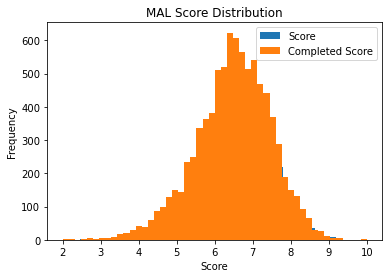

In [28]:
  #### MAIN FUNCTION ####
generate_distribution_histogram(anime_df_full, 'score',
                                title = 'MAL Score Distribution',
                                x_axis_label = 'Score',
                                y_axis_label = 'Frequency',
                                label_name = 'Score')
generate_distribution_histogram(anime_df_full, 'score_comp',
                                title = 'MAL Score Distribution',
                                x_axis_label = 'Score',
                                y_axis_label = 'Frequency',
                                label_name = 'Completed Score')

The distributions of scores and scores by users marking the anime as completed are very similar. We have reason to believe these distributions are not statistically different. 

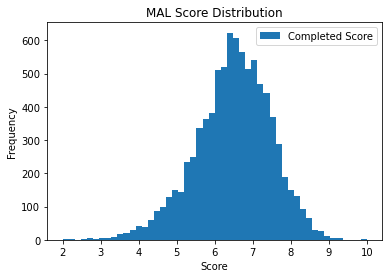

In [29]:
generate_distribution_histogram(anime_df_full, 'score_comp',
                                title = 'MAL Score Distribution',
                                x_axis_label = 'Score',
                                y_axis_label = 'Frequency',
                                label_name = 'Completed Score')

In [30]:
anime_all_scores = anime_df_full[anime_df_full.score.notna() & anime_df_full.score_comp.notna()]

In [31]:
# score by all users > score by users marking anime as completed
print(sum(anime_all_scores.score > anime_all_scores.score_comp)/len(anime_all_scores))
# score by all users < score by users marking anime as completed
print(sum(anime_all_scores.score < anime_all_scores.score_comp)/len(anime_all_scores))

0.4968442683105827
0.5030089534713048


# Anime Type 

Anime Type reports six distinct values. 54.6% of anime in our data are TV anime. 22.2% are OVAs, 12.5% are ONAs, 9.1% are specials, 0.9% are movies, and 0.6% are music. 

In [32]:
# count anime type 
print(anime_df_full.type.value_counts()/len(anime_df_full)) # TV: 4734, OVA: 1925, ONA: 1087, Special: 791, Movie: 74, Music: 53

TV         0.546336
OVA        0.222158
ONA        0.125447
Special    0.091287
Movie      0.008540
Music      0.006117
Name: type, dtype: float64


# Anime Source

In [33]:
# count anime source 
print(anime_df_full.source.value_counts())

Manga            2366
Original         2044
Visual novel      715
Light novel       486
Game              465
Novel             290
Other             276
4-koma manga      208
Web manga         186
Picture book       70
Card game          47
Book               45
Music              26
Digital manga      13
Radio               9
Name: source, dtype: int64


For source, we grouped those in the visual novel, light novel, and book categories under 'Novel', those in the '4-koma manga', 'Digital manga', and 'Web manga' category under 'Manga', and those in the Picture book, Card game, Book, Music

In [34]:
source_dict = {
    'Manga': 'Manga',
    'Original': 'Original',
    'Novel': 'Novel',
    'Game': 'Game',
    'Other': 'Other',
    'Visual novel': 'Novel',
    'Light novel': 'Novel',
    'Book': 'Novel',
    '4-koma manga': 'Manga',
    'Web manga': 'Manga',
    'Digital manga': 'Manga',
    'Picture book': 'Other',
    'Card game': 'Other',
    'Music': 'Other',
    'Radio': 'Other'
}

# changing the seasons column data type to string
anime_df_full.source = anime_df_full.source.astype('str')
# mapping the values 0-3 to actual written seasons
anime_df_full.source = anime_df_full.source.map(source_dict)

In [35]:
print(anime_df_full.source.value_counts() / len(anime_df_full))

Manga       0.320023
Original    0.235892
Novel       0.177265
Game        0.053664
Other       0.049394
Name: source, dtype: float64


After recharacterizing the source types, we have that 32% of the anime in our data have source material from a manga, 23.6% are original anime, 17.7% are from novels, 5.4% are from games and the remaining 4.9% are from other sources. 

# Duration

In [36]:
#anime_df_full.duration.unique()

array(['24 min. per ep.', '25 min. per ep.', '23 min. per ep.',
       '27 min. per ep.', '22 min. per ep.', '30 min. per ep.',
       '21 min. per ep.', '14 min. per ep.', '12 min. per ep.',
       '34 min. per ep.', '46 min. per ep.', '20 min. per ep.',
       '26 min. per ep.', '28 min. per ep.', '15 min. per ep.',
       '29 min. per ep.', '33 min. per ep.', '4 min. per ep.',
       '7 min. per ep.', '18 min. per ep.', '11 min. per ep.',
       '13 min. per ep.', '37 min. per ep.', '42 min. per ep.',
       '45 min. per ep.', '39 min. per ep.', '5 min. per ep.',
       '36 min. per ep.', '31 min. per ep.', '8 min. per ep.',
       '6 min. per ep.', '35 min. per ep.', '1 min. per ep.',
       '3 min. per ep.', '54 min. per ep.', '16 min. per ep.',
       '50 min. per ep.', '48 min. per ep.', '17 min. per ep.',
       '10 min. per ep.', '43 min. per ep.', '9 min. per ep.',
       '32 min. per ep.', '40 min. per ep.', '47 min. per ep.',
       '52 min. per ep.', '51 min. per ep.', '41

In [37]:
duration_df = anime_df_full.duration.str.split(".", expand=True)

In [38]:
duration_df.columns = ['first_time', 'second_time', 'third_time', 'fourth_time']

In [40]:
# min, sec, hr
print(duration_df.first_time.unique()) # preserve info from first two rows
# min
print(duration_df.second_time.unique())
print(duration_df.third_time.unique())
print(duration_df.fourth_time.unique())

['24 min' '25 min' '23 min' '27 min' '22 min' '30 min' '21 min' '14 min'
 '12 min' '34 min' '46 min' '20 min' '26 min' '28 min' '15 min' '29 min'
 '33 min' '4 min' '7 min' '18 min' '11 min' '13 min' '37 min' '42 min'
 '45 min' '39 min' '5 min' '36 min' '31 min' '8 min' '6 min' '35 min'
 '1 min' '3 min' '54 min' '16 min' '50 min' '48 min' '17 min' '10 min'
 '43 min' '9 min' '32 min' '40 min' '47 min' '52 min' '51 min' '41 min'
 '58 min' '38 min' '1 hr' '2 min' '55 min' '53 min' '49 min' '57 min'
 '44 min' '19 min' '30 sec' '22 sec' '40 sec' '39 sec' nan '15 sec'
 '53 sec' '33 sec' '34 sec' '24 sec' '37 sec' '31 sec' '29 sec' '45 sec'
 '35 sec' '49 sec' '41 sec' '26 sec' '58 sec' '32 sec' '16 sec' '51 sec'
 '57 sec' '10 sec' '44 sec' '36 sec' '20 sec' '42 sec' '18 sec' '46 sec'
 '56 sec' '50 sec' '54 sec' '21 sec' '25 sec' '12 sec' '38 sec' '14 sec'
 '6 sec' '23 sec' '28 sec' '43 sec' '55 sec']
[' per ep' ' 5 min' ' 17 min' ' 38 min' ' 7 min' ' 35 min' ' 30 min'
 ' 52 min' ' 2 min' ' 14 

In [45]:
# sec
duration_df['sec'] = np.where(duration_df.first_time.str.contains('sec'), duration_df.first_time, 0)
# min first
duration_df['min1'] = np.where(duration_df.first_time.str.contains('min'), duration_df.first_time, 0)
# min second
duration_df['min2'] = np.where(duration_df.second_time.str.contains('min'), duration_df.second_time, duration_df.min1)
# hr
duration_df['hr'] = np.where(duration_df.first_time.str.contains('hr'), duration_df.first_time, 0)

#duration_df['minute'] = np.where(duration_df.first_time.str.contains('min'), duration_df.first_time.str.extract('(\d+)'), 0)
#duration_df['minute'] = np.where(duration_df.second_time.str.contains('min'), duration_df.second_time.str.extract('(\d+)'), 
 #duration_df.minute)

In [50]:
# remove labels for time measurements
duration_df['sec'] = duration_df.sec.str.extract('(\d+)')
duration_df['min2'] = duration_df.min2.str.extract('(\d+)')
duration_df['hr'] = duration_df.hr.str.extract('(\d+)')

In [55]:
duration_df['sec'] = duration_df.sec.astype('float64')
duration_df['min2'] = duration_df.min2.astype('float64')
duration_df['hr'] = duration_df.hr.astype('float64')

In [66]:
duration_df.sec = duration_df.sec.fillna(0)
duration_df.min2 = duration_df.min2.fillna(0)
duration_df.hr = duration_df.hr.fillna(0)

In [78]:
duration_df['total_secs'] = duration_df.sec + (duration_df.min2*60) + (duration_df.hr*3600)
duration_df['duration_mins'] = duration_df.total_secs/60

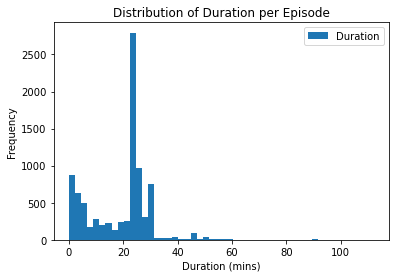

In [79]:
generate_distribution_histogram(duration_df, 'duration_mins',
                                title = 'Distribution of Duration per Episode',
                                x_axis_label = 'Duration (mins)',
                                y_axis_label = 'Frequency',
                                label_name = 'Duration')

In [80]:
duration_in_mins = pd.DataFrame(duration_df,
                                columns=['duration_mins'])
anime_df_full = pd.concat([anime_df_full, duration_in_mins], axis=1)

In [83]:
# replace 0 duration with NaN 
anime_df_full.duration_mins = anime_df_full.duration_mins.replace(0, np.nan)

# Genres

In [87]:
genres_df = anime_df_full.genres.str.split(",", expand=True)

In [89]:
#genres_df
genres_df.columns = ['g0', 'g1', 'g2', 'g3', 'g4', 'g5', 'g6', 'g7', 'g8', 'g9',
                       'g10', 'g11', 'g12']

In [113]:
genres_df

,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12
0,Action,Adventure,Comedy,Drama,Sci-Fi,Space,None,None,None,None,None,None,None
1,Action,Sci-Fi,Adventure,Comedy,Drama,Shounen,None,None,None,None,None,None,None
2,Action,Mystery,Police,Supernatural,Drama,Magic,None,None,None,None,None,None,None
3,Adventure,Fantasy,Shounen,Supernatural,None,None,None,None,None,None,None,None,None
4,Action,Sports,Comedy,Shounen,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8660,Action,Martial Arts,Fantasy,Shounen,None,None,None,None,None,None,None,None,None
8661,Slice of Life,Comedy,Supernatural,None,None,None,None,None,None,None,None,None,None
8662,Comedy,Parody,None,None,None,None,None,None,None,None,None,None,None
8663,Slice of Life,Magic,Fantasy,Shounen,None,None,None,None,None,None,None,None,None


In [107]:
genre_occ = np.concatenate(pd.Series({col:genres_df[col] for col in genres_df}))

In [125]:
genre_occ_list = genre_occ.tolist()

In [140]:
for x in genre_occ_list:
    print(x)

Action
Action
Action
Adventure
Action
Comedy
Slice of Life
Action
Drama
Action
Action
Action
Comedy
Action
Action
Action
Comedy
Action
Action
Action
Action
Action
Game
Comedy
Comedy
Action
Sci-Fi
Harem
Action
Adventure
Comedy
Adventure
Sci-Fi
Action
Action
Harem
Sci-Fi
Action
Action
Slice of Life
Action
Sci-Fi
Action
Action
Action
Action
Comedy
Action
Action
Action
Harem
Action
Adventure
Military
Military
Military
Space
Drama
Action
Action
Sci-Fi
Action
Action
Action
Adventure
Action
Action
Comedy
Comedy
Slice of Life
Comedy
Adventure
Adventure
Slice of Life
Drama
Adventure
Adventure
Adventure
Action
Sci-Fi
Action
Action
Comedy
Adventure
Adventure
Adventure
Adventure
Comedy
Slice of Life
Action
Music
Adventure
Adventure
Comedy
Comedy
Action
Action
Action
Action
Action
Action
Comedy
Action
Comedy
Action
Action
Action
Action
Mecha
Adventure
Supernatural
Drama
Comedy
Sci-Fi
Drama
Drama
Action
Action
Action
Action
Action
Action
Action
Comedy
Slice of Life
Adventure
Adventure
Action
Comedy


In [ ]:
unique_genres2 = set(np.concatenate(pd.Series({col:genre_occ_list.unique() for col in genres_df})))

In [105]:
unique_genres = set(np.concatenate(pd.Series({col:genres_df[col].unique() for col in genres_df})))

There are 83 unique genres documented in the dataset. We will abitrarily choose to preserve the top 15 most common genres.  

In [118]:
# number of anime listed under each genre
# Note: one anime can be listed under multiple genre 
count_genre = Counter(genre_occ)
print(count_genre.most_common())

[(None, 84881), ('Action', 2196), ('Comedy', 2014), (' Comedy', 1738), (' Fantasy', 1498), (' Sci-Fi', 1190), (' Shounen', 1181), (' Romance', 1158), (' School', 1082), (' Drama', 1017), (' Supernatural', 890), (' Adventure', 853), ('Adventure', 778), ('Hentai', 761), (' Magic', 633), (' Mecha', 621), ('Slice of Life', 606), (' Slice of Life', 587), (' Kids', 576), (' Historical', 501), (' Seinen', 499), (' Ecchi', 473), (' Shoujo', 425), (' Parody', 382), (' Super Power', 342), (' Sports', 323), (' Mystery', 299), ('Kids', 285), (' Demons', 278), (' Martial Arts', 273), ('Drama', 269), ('Sci-Fi', 265), (' Military', 259), (' Space', 236), (' Horror', 222), ('Music', 203), (' Harem', 196), ('Fantasy', 170), (' Psychological', 170), (nan, 143), (' Music', 140), (' Hentai', 135), (' Game', 123), ('Game', 119), (' Police', 118), ('Mystery', 115), ('Harem', 110), (' Samurai', 105), (' Vampire', 88), ('Historical', 83), ('Ecchi', 83), ('Sports', 82), ('Romance', 76), (' Josei', 69), (' Thri

In [119]:
len(unique_genres)

83